In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [70]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [71]:
df.shape

(8807, 12)

In [72]:
df.isnull().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [73]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [74]:
df.isnull().sum().sum()

4307

In [75]:
df.director

0       Kirsten Johnson
1                   NaN
2       Julien Leclercq
3                   NaN
4                   NaN
             ...       
8802      David Fincher
8803                NaN
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [76]:
df.director.fillna("No Director", inplace=True)
df.director

0       Kirsten Johnson
1           No Director
2       Julien Leclercq
3           No Director
4           No Director
             ...       
8802      David Fincher
8803        No Director
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [77]:
df.cast

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [78]:
df.cast.fillna("No Cast", inplace=True)
df.cast

0                                                 No Cast
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 No Cast
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              No Cast
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [79]:
df.country.fillna("No Country", inplace=True)
df.country

0       United States
1        South Africa
2          No Country
3          No Country
4               India
            ...      
8802    United States
8803       No Country
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [80]:
print(df.columns)
df.dropna(subset=["date_added", "rating", "duration"], inplace=True)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [81]:
df.shape

(8790, 12)

In [82]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [16]:
# MASSIMO E MONIMO REALEASE_YEAR

In [83]:
# MASSIMO E MINIMO
min_year = df['release_year'].min()
max_year = df['release_year'].max()
print("Anno più lontano -> {}".format(min_year))
print("Anno più recente -> {}".format(max_year))

Anno più lontano -> 1925
Anno più recente -> 2021


In [84]:
# Raggruppamento contenuti con rating PG-13
df.groupby('rating').get_group("PG-13")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8757,s8758,Movie,World Trade Center,Oliver Stone,"Nicolas Cage, Michael Peña, Maggie Gyllenhaal,...",United States,"November 20, 2019",2006,PG-13,129 min,"Action & Adventure, Dramas","Working under treacherous conditions, an army ..."
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8767,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."


In [85]:
# Raggruppamento contenuti con rating PG-13 ordinati in funzione dell'anno di pubblicazione
df.groupby('rating').get_group("PG-13").shape

(490, 12)

In [89]:
df.groupby('rating').get_group("PG-13").sort_values(by=['release_year'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
88,s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",No Country,"September 9, 2021",2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal..."
560,s561,Movie,Audible,Matt Ogens,No Cast,No Country,"July 1, 2021",2021,PG-13,39 min,"Documentaries, Sports Movies","Shaken by a friend's suicide, a Deaf high scho..."
1370,s1371,Movie,The Dig,Simon Stone,"Carey Mulligan, Ralph Fiennes, Lily James, Joh...",United Kingdom,"January 29, 2021",2021,PG-13,113 min,"Dramas, International Movies","On the eve of World War II, a British widow hi..."
1088,s1089,Movie,Thunder Force,Ben Falcone,"Melissa McCarthy, Octavia Spencer, Jason Batem...",United States,"April 9, 2021",2021,PG-13,107 min,"Action & Adventure, Comedies",Two childhood best friends reunite as an unlik...
...,...,...,...,...,...,...,...,...,...,...,...,...
7844,s7845,Movie,Red Dawn,John Milius,"Patrick Swayze, C. Thomas Howell, Lea Thompson...",United States,"December 31, 2019",1984,PG-13,114 min,"Action & Adventure, Cult Movies",A group of teenagers witnesses Soviet and Cuba...
4861,s4862,Movie,Lupin the 3rd: The Castle of Cagliostro: Speci...,Hayao Miyazaki,"Yasuo Yamada, Kiyoshi Kobayashi, Eiko Masuyama...",Japan,"May 15, 2018",1979,PG-13,100 min,"Action & Adventure, Anime Features, Classic Mo...","Lupin, his sidekick, Jigen, and the samurai wa..."
7659,s7660,Movie,Once Upon a Time in the West,Sergio Leone,"Henry Fonda, Charles Bronson, Claudia Cardinal...","Italy, United States","November 20, 2019",1968,PG-13,166 min,"Action & Adventure, Classic Movies, Internatio...","In this epic spaghetti Western, a flinty gunsl..."
6619,s6620,Movie,Doctor Zhivago,David Lean,"Omar Sharif, Julie Christie, Geraldine Chaplin...","United States, Italy, United Kingdom, Liechten...","November 1, 2019",1965,PG-13,200 min,"Classic Movies, Dramas, Romantic Movies",A young physician and his beautiful mistress g...


Movie -> 6126
TV Show -> 2664


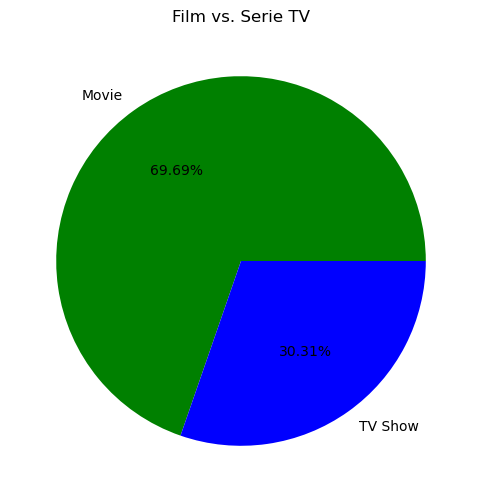

In [90]:
for i in range(0, len(df.type.value_counts())):
    print("{} -> {}".format(df.type.value_counts().index[i], df.type.value_counts()[i]))
    
plt.figure(figsize=(12, 6))
plt.title("Film vs. Serie TV")
g = plt.pie(
    df.type.value_counts(),
    labels=df.type.value_counts().index,
    autopct="%1.2f%%",
    colors=['green', 'blue']
)    

#for c in df.type.value_counts():
   # print(c)




#ptl.figure(figsize=(12, 6))
#plt.title("Serie TV vs. Film")


In [93]:
df.listed_in.head()

0                                        Documentaries
1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
Name: listed_in, dtype: object

In [94]:
# Filtraggio generi
genres = df.listed_in.str.split(",", expand=True)
genres

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [95]:
# Visualizzo shape
genres.shape

(8790, 3)

In [96]:
# Inpilo i valori (stack())
genres = genres.stack()

In [97]:
# Visualizzo shape
genres.shape

(19294,)

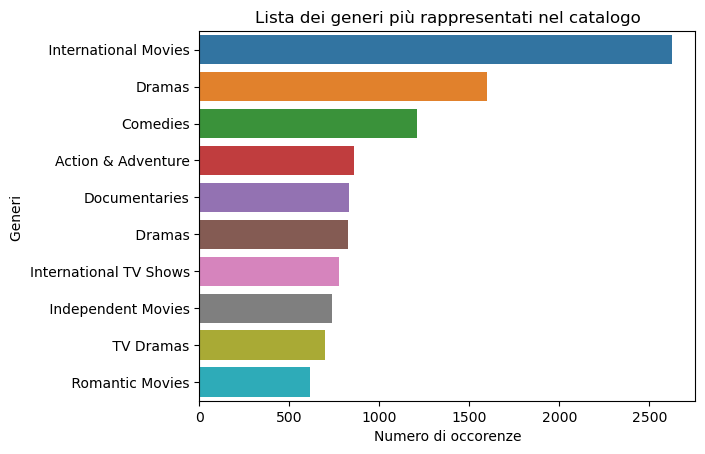

In [98]:
#genres.value_counts().index
#genres.value_counts()
g = sns.countplot(y=genres, order=genres.value_counts().index[:10])
plt.title("Lista dei generi più rappresentati nel catalogo")
plt.xlabel("Numero di occorenze")
plt.ylabel("Generi ")
plt.show()

In [99]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [100]:
# Pulizia dataframe
df_cast = df[df['cast']!= "No Cast"]
df_cast.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No Country,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [101]:
df_cast['cast']

1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5       Kate Siegel, Zach Gilford, Hamish Linklater, H...
6       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 7965, dtype: object

In [102]:
# Filtraggio attori
actors = df_cast['cast'].str.split(",",expand=True)
actors

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
2,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
4,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Kate Siegel,Zach Gilford,Hamish Linklater,Henry Thomas,Kristin Lehman,Samantha Sloyan,Igby Rigney,Rahul Kohli,Annarah Cymone,Annabeth Gish,...,None,None,None,None,None,None,None,None,None,None
6,Vanessa Hudgens,Kimiko Glenn,James Marsden,Sofia Carson,Liza Koshy,Ken Jeong,Elizabeth Perkins,Jane Krakowski,Michael McKean,Phil LaMarr,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Ali Suliman,Saleh Bakri,Yasa,Ali Al-Jabri,Mansoor Alfeeli,Ahd,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8802,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
8804,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8805,Tim Allen,Courteney Cox,Chevy Chase,Kate Mara,Ryan Newman,Michael Cassidy,Spencer Breslin,Rip Torn,Kevin Zegers,None,...,None,None,None,None,None,None,None,None,None,None


In [103]:
# Visualizzo shape
actors.shape

(7965, 50)

In [104]:
# Inpilo i valori (stack())
actors = actors.stack()
actors

1     0                Ama Qamata
      1               Khosi Ngema
      2             Gail Mabalane
      3            Thabang Molaba
      4          Dillon Windvogel
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 64016, dtype: object

In [105]:
# Visualizzo shape
actors.shape

(64016,)

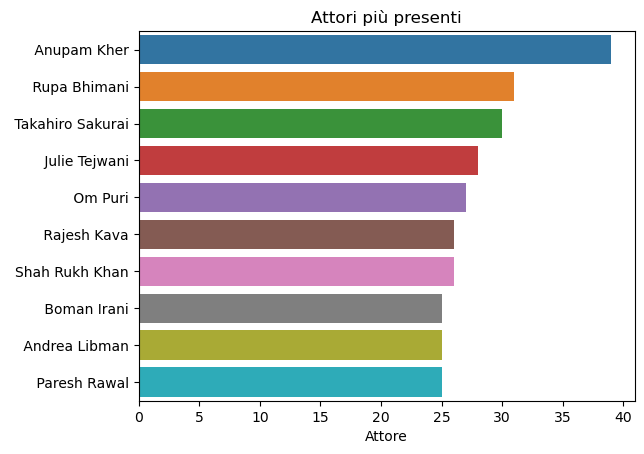

In [106]:
g = sns.countplot(y = actors, order=actors.value_counts().index[:10])
plt.title("Attori più presenti")
plt.xlabel("Numero di occorrenze")
plt.xlabel("Attore")

plt.show()

In [107]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [108]:
# Visualizzo i rating
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

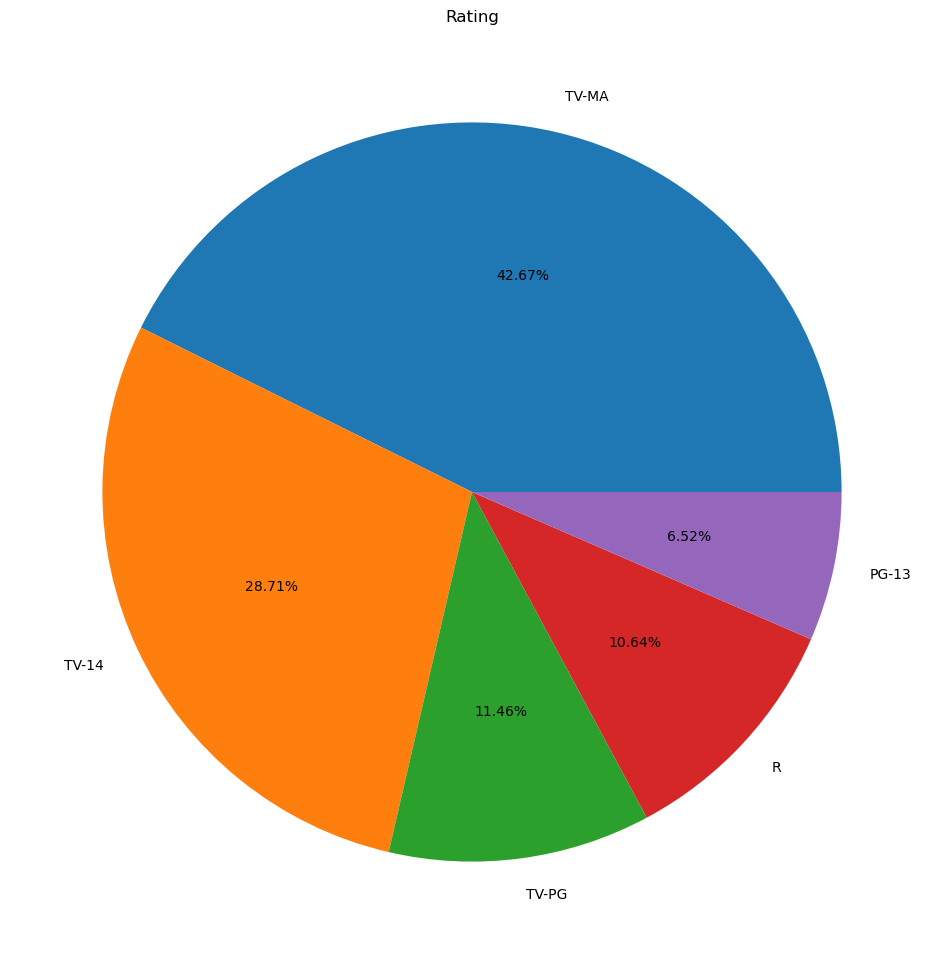

In [109]:
plt.figure(figsize=(18, 12))
plt.title("Rating")
g = plt.pie(
    df.rating.value_counts()[:5],
    labels=df.rating.value_counts().index[:5],
    autopct="%1.2f%%"
)

plt.show()

In [110]:
# Importiamo libreria per contare gli oggetti
from collections import Counter

In [111]:
# Definiamo la funzione
# dataframe: dataframe di input
# column_name: nome della colonna di riferimento
# limit: numero di elementi da visualizzare in ordine di c
def return_counter(dataFrame, column_name, limit):
    c = Counter(dataFrame[column_name].values)
    most_common = c.most_common(limit)
    print(dict(most_common))
    

In [112]:
# Conteggio per "country"
return_counter(dataFrame=df, column_name="country", limit=3)

{'United States': 2809, 'India': 972, 'No Country': 829}


In [113]:
# Conteggio per "release_year"
return_counter(dataFrame=df, column_name="release_year", limit=3)

{2018: 1146, 2017: 1030, 2019: 1030}


In [114]:
# Conteggio per "director"
return_counter(dataFrame=df, column_name="director", limit=3)

{'No Director': 2621, 'Rajiv Chilaka': 19, 'Raúl Campos, Jan Suter': 18}


In [116]:
#VISUALIZZAZIONE DEI FILM DI UN PARTICOLARE REGISTA

In [115]:
df_director = df[df['director']== "Martin Scorsese"]
print(df_director)

     show_id   type                                              title  \
1358   s1359  Movie                                     Shutter Island   
2632   s2633  Movie                       No Direction Home: Bob Dylan   
2860   s2861  Movie                                               Hugo   
3227   s3228  Movie                                       The Irishman   
3759   s3760  Movie  Rolling Thunder Revue: A Bob Dylan Story by Ma...   
6111   s6112  Movie                    Alice Doesn't Live Here Anymore   
6826   s6827  Movie                                  Gangs of New York   
6880   s6881  Movie                                         GoodFellas   
7431   s7432  Movie                                       Mean Streets   
7820   s7821  Movie                                        Raging Bull   
8272   s8273  Movie                                       The Departed   
8735   s8736  Movie                    Who's That Knocking at My Door?   

             director                

In [46]:
df_director['title']

1358                                       Shutter Island
2632                         No Direction Home: Bob Dylan
2860                                                 Hugo
3227                                         The Irishman
3759    Rolling Thunder Revue: A Bob Dylan Story by Ma...
6111                      Alice Doesn't Live Here Anymore
6826                                    Gangs of New York
6880                                           GoodFellas
7431                                         Mean Streets
7820                                          Raging Bull
8272                                         The Departed
8735                      Who's That Knocking at My Door?
Name: title, dtype: object

In [117]:
# VISUALIZZAZIONE DELLE NAZIONI IN CUI SI SONO GIRATI I FILM DEL REGISTA SELEZIONATO 

In [118]:
print(set(df_director['country']))

{'United Kingdom, United States, France', 'United Kingdom, United States, Japan', 'United States, Hong Kong', 'United States', 'United States, Italy'}


In [49]:
#SELEZIONE TIPOLOGIA FILM

In [119]:
df_movie = df[df['type'] == "Movie"]
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [120]:
#VISUALIZZAZIONE DURATA
type(df_movie.iloc[0]['duration'])

str

In [121]:
int("180 min".rstrip("min"))

180

In [53]:
#TRASFORMAZIONE DEI VALORI IN MINUTI
df_duration = df_movie['duration'].map(lambda x: x.rstrip("min")).astype(int)
df_duration


0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

In [122]:
#STATISTICHE SULLE DURATE DEI FILM

In [123]:

print(set(df_duration))

{3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 200, 201, 203, 204, 205, 208, 209, 212, 214, 224, 228, 229, 230, 233, 237, 253, 273, 312}


In [124]:
# Media in minuti
print(df_duration.mean())

99.58488410055502


In [125]:
# Minima durata in minuti
print(df_duration.min())

3


In [126]:
# Massima durata in minuti
print(df_duration.max())

312


In [127]:
# Mediana
print(df_duration.median())

98.0


In [128]:
# Deviazione standard
print(df_duration.std())

28.283224595386695


<Axes: >

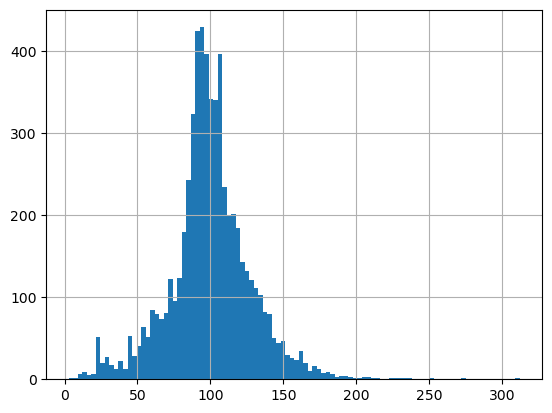

In [136]:
# Istogramma distribuzione durate dei film
df_duration.hist(bins=100)

In [137]:
# Trasformazione data caricamento in datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [139]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [140]:
# Visualizzazione ultima data di caricamento
df['date_added'].max()

Timestamp('2021-09-25 00:00:00')

In [133]:
# Visualizzazione prima data di caricamento
df['date_added'].min()

' April 15, 2018'

In [148]:
# Impostazione indice
df.set_index('date_added', inplace=True)

In [151]:
# Contenuti aggiunti Gennaio 2008
df.loc['2008-01']

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,,,,
2008-01-01,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."


In [150]:
# Contenuti aggiunti nel 2009
df.loc['2009']

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,,,,
2009-11-18,s5956,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r..."
2009-05-05,s5957,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...


In [147]:
# Contenuti aggiunti tra il 2008 e il 2011 ordinati in funzione dell'anno di pubblicazione
df.loc['2008':'2011'].sort_values(by='release_year', ascending=False)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2008,s2009,TV Show,Family Business,No Director,"Jonathan Cohen, Gérard Darmon, Julia Piaton, L...",France,2020-09-11,2020,TV-MA,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",After learning France is about to legalize pot...
2011,s2012,Movie,Pets United,Reinhard Klooss,"Patrick Roche, Natalie Dormer, Eddie Marsan, F...","Germany, China, United Kingdom",2020-09-11,2020,TV-Y7,93 min,"Children & Family Movies, Comedies",A street-smart dog and a pampered cat join for...
2010,s2011,Movie,How to Train Your Dragon 2,Dean DeBlois,"Jay Baruchel, Cate Blanchett, Gerard Butler, C...",United States,2020-09-11,2014,PG,102 min,Children & Family Movies,"Hiccup, Toothless and a mysterious dragon ride..."
2009,s2010,TV Show,Girlfriends,No Director,"Tracee Ellis Ross, Golden Brooks, Persia White...",United States,2020-09-11,2007,TV-14,8 Seasons,TV Comedies,Four close friends in Los Angeles challenge an...
